# Unsupervised Learning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans


In [4]:
# Load data
data = pd.read_csv('cleaned_insurance_data.csv')

data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,60,1,48371.0,2,0,2,0,25.346926,2,0,1,11,330,7,927,2023-02-27 15:21:39.078837,0,0,3,2
1,38,0,31769.0,1,1,1,1,14.736611,2,0,1,9,521,7,4016,2020-09-16 15:21:39.078837,0,1,0,1
2,56,1,26209.0,0,1,0,1,33.238300,0,1,0,10,424,5,828,2021-03-29 15:21:39.078837,1,1,2,2
3,40,0,29471.0,0,4,3,2,31.565248,2,2,1,14,796,7,975,2023-05-03 15:21:39.078837,0,0,3,1
4,41,1,36427.0,0,2,3,0,13.264415,1,1,0,11,444,9,207,2022-02-14 15:21:39.078837,2,1,3,1


# Clustering

Since the data is already standardized, we will proceed directly to K-means clustering

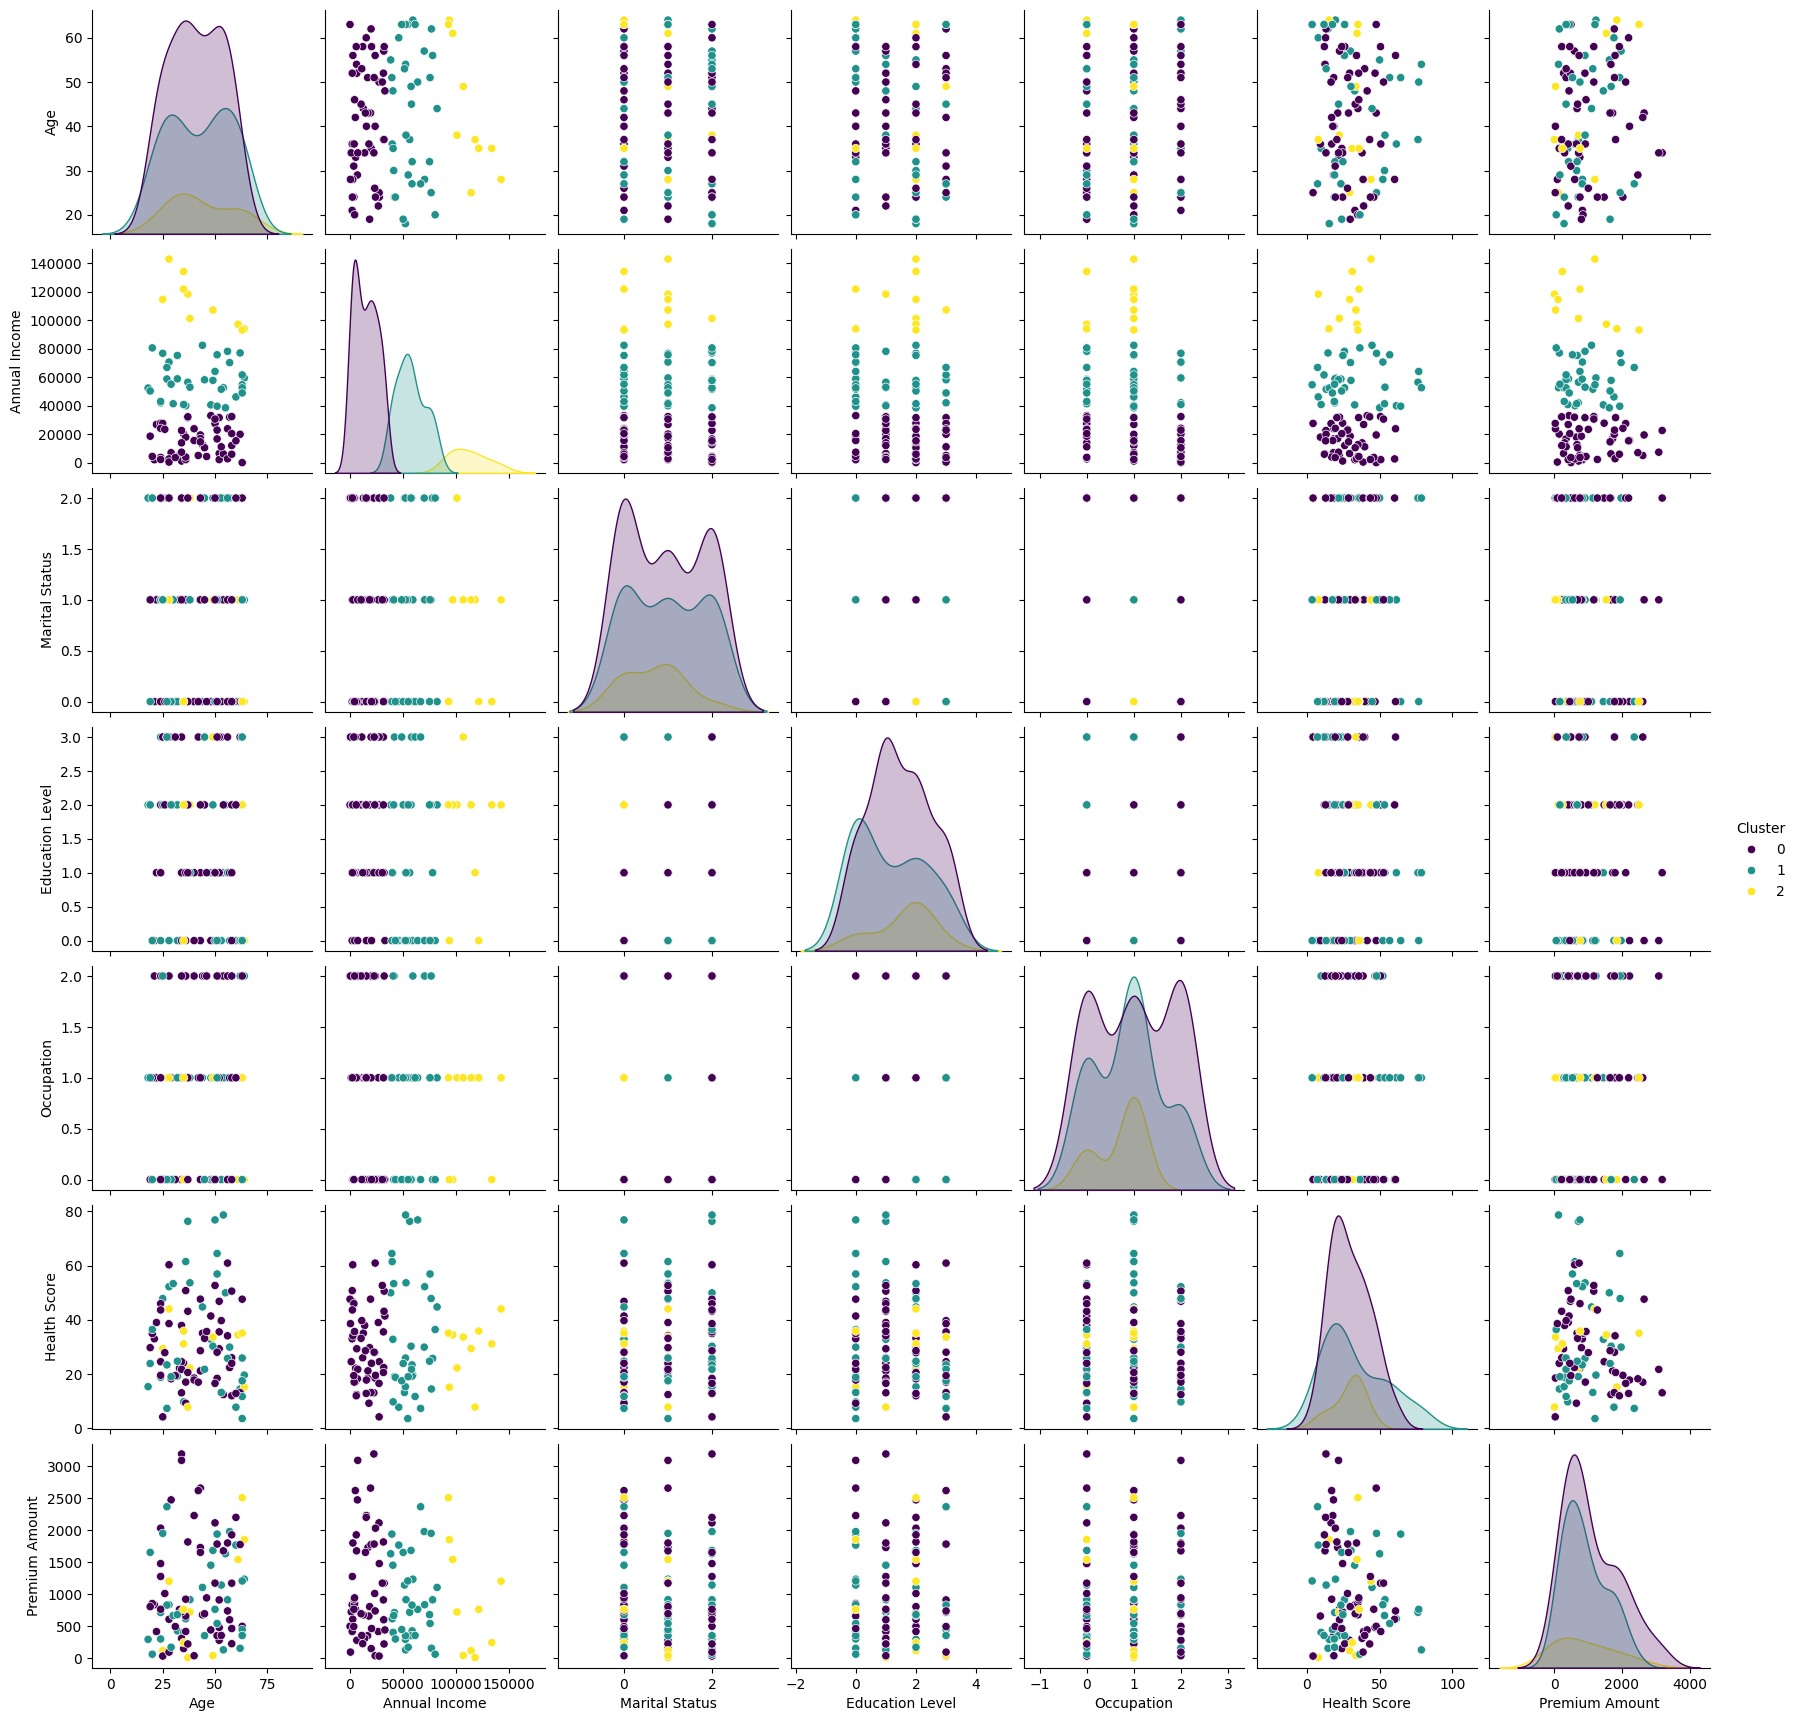

In [13]:
# Clustering with KMeans

# Selecting the most relevant features
X = data[['Age', 'Annual Income', 'Marital Status', 'Education Level', 'Occupation','Health Score', 'Premium Amount']]

# Sample data 
# Comment this line when no longer needed
X = X.sample(100)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
X['Cluster'] = kmeans.labels_

# Plotting
sns.pairplot(X, hue='Cluster', palette='viridis')
plt.show()


### High-Premium Customers

Yellow cluster seems to align with higher premium amounts and possibly higher health scores.
These might be individuals with better insurance coverage, indicating they could belong to a higher-income or more health-conscious segment.

### Low-Income, Low-Premium Customers

The purple cluster aligns more with lower annual incomes and lower premium amounts.
These may represent budget-conscious customers or those with minimal coverage.

### Intermediate Cluster

The teal cluster might represent individuals falling between the two extremes (average income, health score, and premium).

# Cluster Profiling

In [ ]:
# Cluster Profiling
cluster_profile = X.groupby('Cluster').mean()
print(cluster_profile)

# Save the cluster profile
cluster_profile.to_csv('cluster_profile.csv')

               Age  Annual Income  Marital Status  Education Level  \
Cluster                                                              
0        41.037037   14988.185185        0.944444         1.462963   
1        42.555556   57540.333333        0.972222         1.166667   
2        43.500000  112406.000000        0.700000         1.600000   

         Occupation  Health Score  Premium Amount  
Cluster                                            
0          1.018519     29.696504     1104.870370  
1          0.888889     33.019128      910.222222  
2          0.700000     28.900115      900.600000  


### **Cluster 0** (Lower Income, Moderate Premium, Average Health)
**Age:** Average age of 41 years. <br>
**Annual Income:** Lower-income group with an average income of 14,988. <br>
**Marital Status:** Most individuals in this cluster are likely married (mean of 0.94, close to 1).<br>
**Education Level:** Moderate education level (mean of 1.46, where 1 might represent "High School" or "Some College").<br>
**Occupation:** Likely to have entry-level or less skilled jobs (mean of 1.01).<br>
**Health Score:** Moderate health score of ~29.70, not the healthiest group but not significantly unhealthy either.<br>
**Premium Amount:** Moderate insurance premiums, averaging 1,104.

### **Cluster 1** (Middle Income, Highest Health, Moderate Premium)
**Age:** Slightly older group, average age of 42.6 years.<br>
**Annual Income:** Middle-income segment with an average income of 57,540.<br>
**Marital Status:** Likely married, with a slightly higher average marital status score (0.97).<br>
**Education Level:** A bit lower in education level compared to Cluster 0 (mean of 1.16).<br>
**Occupation:** Similar to Cluster 0, likely in entry-level jobs or semi-skilled positions (mean of 0.89).<br>
**Health Score:** Highest health score among all clusters, averaging 33.02.<br>
**Premium Amount:** Moderate insurance premiums, averaging 910.<br>

### **Cluster 2** (Higher Income, Lowest Premium, Slightly Poorer Health)
**Age:** Oldest group, average age of 43.5 years.<br>
**Annual Income:** High-income segment, with an average income of 112,406.<br>
**Marital Status:** Less likely to be married (average of 0.70, significantly lower than other clusters).<br>
**Education Level:** Highest level of education, with an average of 1.6.<br>
**Occupation:** More likely to have skilled or professional jobs (mean of 0.70, suggesting higher occupational roles).<br>
**Health Score:** Slightly lower health score of 28.9 compared to Cluster 1, but close to Cluster 0.<br>
**Premium Amount:** Lowest insurance premiums, averaging 900.<br>

# Validation

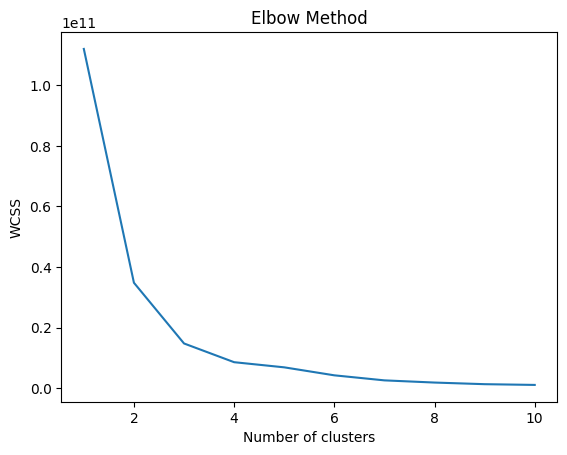

[112045926399.62897, 34818469648.40357, 14761126891.297525, 8575926274.708722, 6876930583.5406275, 4238674741.80615, 2572643617.8886423, 1849981792.4608343, 1313851097.1399207, 1069159182.3170805]


In [20]:
# Validate the number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print(wcss)

